In [2]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)


matplotlib.rcParams['axes.unicode_minus'] = False  

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
#wave data만들기

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
#regressor 모델 생성
#k개의 최근접 이웃이 가진 값의 평균값을 출력함

reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Regressor Parameter

- metric = minkoski p=2 >> Euclidian Distance 를 기본으로 거리 계산
- n_neighbors = 3개나 5개가 보편적


In [9]:
prec = reg.predict(X_test)
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2:{:.2f}".format(reg.score(X_test, y_test)))

#정확도 측정 X. 

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2:0.83


 R^2 = 결정계수

> 모든 예측값 = 타겟의 평균이라 가정 -> 단순한 예측 모형
> - 단순 예측 모형과 만든 예측 모형을 비교함 
> - 모형 사이의 차이를 0~1 사이로 표현

> R^2 = 1-∑(오차^2)/∑(편차^2)

> R^2 = 0  
> - 만든 예측값= 평균값

> R^2 = 1 
> - 오차가 0. 완벽한 예측
> - training error = 0 > 과적합

> 평균보다 나쁘게 예측하면 결정계수가 음수가 될 수 있음 ..

Text(0, 0.5, '타깃')

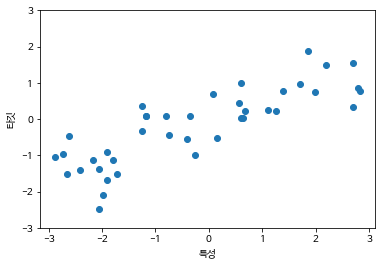

In [52]:
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

#print(X_test)

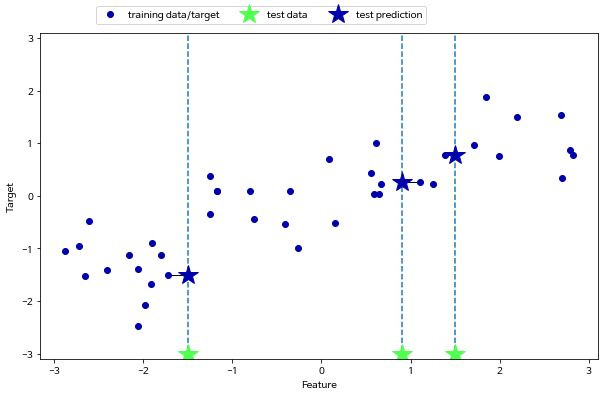

In [27]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

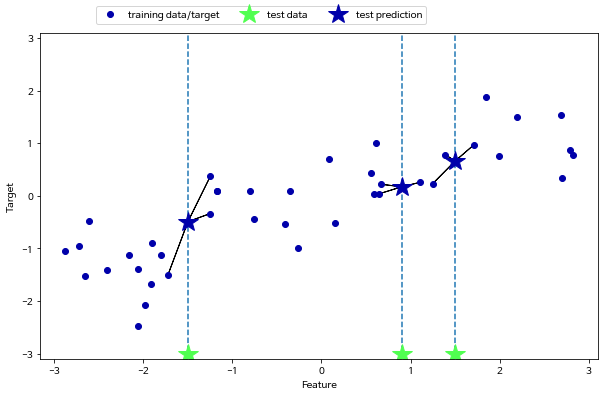

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [5]:
n_neighbors = [1,3,5,7]
test_size = [0.2, 0.4, 0.6, 0.8]
test_score = []
train_score = []

for ns in n_neighbors:
    #print("n_neighbors = ", ns)
    reg = KNeighborsRegressor(n_neighbors=ns)
    score1=[]
    score2=[]
    for ts in test_size:
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=ts)
        reg.fit(X_train, y_train)
        score1.append(reg.score(X_test, y_test))
        score2.append(reg.score(X_train, y_train))
    test_score.append(score1)
    train_score.append(score2)

print("K - test_size")
print("훈련 데이터 score")
df_train = pd.DataFrame(train_score, index = n_neighbors, columns=test_size)
display(df_train)

print("테스트 데이터 score")
df_test = pd.DataFrame(test_score, index = n_neighbors, columns=test_size)
display(df_test)



#이웃수와 테스트 사이즈에 따른 결과

K - test_size
훈련 데이터 score


,0.2,0.4,0.6,0.8
1,1.000000,1.000000,1.000000,1.000000
3,0.842444,0.857139,0.823964,0.838195
5,0.793353,0.810168,0.750278,0.555394
7,0.788540,0.739307,0.632182,0.221019


테스트 데이터 score


,0.2,0.4,0.6,0.8
1,0.422796,0.273928,0.530149,0.577086
3,0.818302,0.678542,0.770976,0.544717
5,0.752754,0.690294,0.647724,0.350586
7,0.731279,0.711243,0.579667,0.132158


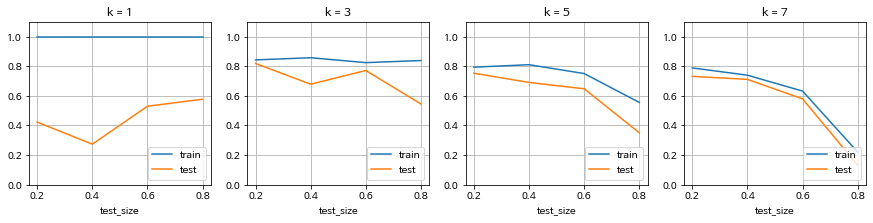

In [105]:
#위의 결과를 그래프로 그려봄

fig, axes = plt.subplots(1,4,figsize=(15,3))

for i, ax in zip(range(4), axes):
    ax.set_title('k = {}'.format(n_neighbors[i]))
    ax.plot(test_size, train_score[i], label='train')
    ax.plot(test_size, test_score[i], label='test')
   
    ax.legend(loc = 4)
    ax.set_xlabel("test_size")
    ax.set_ylim(0,1.1)
    ax.grid()
    

k = 1일땐 훈련 데이터는 점수가 1인데 비해서 테스트 데이터의 경우는 많이 낮음..
 => 과대적합

K의 증가에 따라 훈련 데이터 점수는 감소하고 테스트 데이터는 증가, 안정화

X_train.shape: (30, 1) X_test.shape: (10, 1)


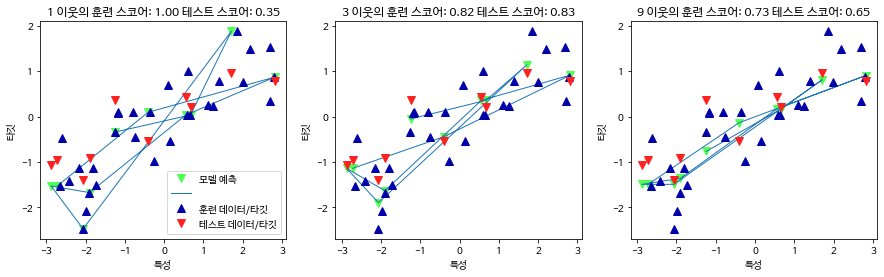

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
fig, axes = plt.subplots(1,3, figsize=(15,4))

print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_test, reg.predict(X_test), linestyle='-', linewidth=1)
    ax.plot(X_train, y_train, '^', c=mglearn.cm3(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm3(1), markersize=8)
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, 
                                 reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", ' ', "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

- k = 1일때 점수가 훈련 >> 테스트로 과대적합 된 것을 확인.

- k = 9일때 타깃의 bias는 커지고 variance는 작아짐. ㅡ 예측값의 연결 선이 점차 일직선이 됨..


K가 증가함에 따라 훈련 스코어는 감소,  테스트 스코어는 증가

Boston Data feature name = RM
X_train.shape: (45, 1) X_test.shape: (15, 1)


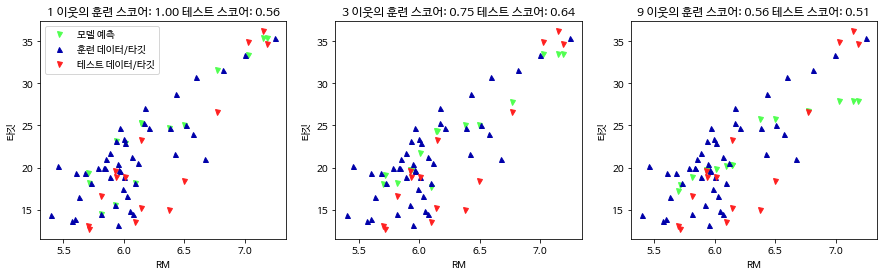

In [32]:
from sklearn.datasets import load_boston

boston = load_boston()

print("Boston Data feature name = {}".format(boston.feature_names[5]))
X = boston.data[:60,5].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, boston.target[:60], random_state=0)
fig, axes = plt.subplots(1,3, figsize=(15,4))

print("X_train.shape: {}".format(X_train.shape), "X_test.shape: {}".format(X_test.shape))

for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=5)
    ax.plot(X_train, y_train, '^', c=mglearn.cm3(0), markersize=5)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm3(1), markersize=5)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(n_neighbors, 
                                 reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel(boston.feature_names[5])
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

#### Boston Data
RM 특성만 사용해서!

- k=1 일때 마찬가지로 과대적합으로 훈련 데이터는 1인 반면 테스트 점수는 낮음
- k=9 일때 훈련 데이터 점수가 많이 떨어짐. 과소적합
